In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import linear_model
import seaborn as sns
import sklearn.model_selection


#bc bahut jyada cheezein iss mein fuck up hui hai 
#seems like it wasnt even it was freezing in the palace
#when they found a better planet only the gentle survive. 

In [21]:
df =pd.read_csv('GlobalTemperatures.csv')
df.head()
df = df.drop(columns = ['LandMaxTemperature','LandMaxTemperatureUncertainty','LandMinTemperature','LandMinTemperatureUncertainty','LandAndOceanAverageTemperature','LandAndOceanAverageTemperatureUncertainty'])
df.head()
df.shape

(3192, 3)

In [3]:
df.describe()

,LandAverageTemperature,LandAverageTemperatureUncertainty
count,3180.000000,3180.000000
mean,8.374731,0.938468
std,4.381310,1.096440
min,-2.080000,0.034000
25%,4.312000,0.186750
50%,8.610500,0.392000
75%,12.548250,1.419250
max,19.021000,7.880000


In [4]:
'''parse_dates takes a Python list of column name(s) for data file columns that contain date data and pandas will parse and convert data in these column(s) to the datetime data type. For many common date formats pandas will automatically recognize and convert the date data.'''

'parse_dates takes a Python list of column name(s) for data file columns that contain date data and pandas will parse and convert data in these column(s) to the datetime data type. For many common date formats pandas will automatically recognize and convert the date data.'

In [5]:
from scipy.stats import linregress

x= df.dt
y = df.LandAverageTemperature

#plt.scatter(x,y)
#plt.plot(x,y)




In [6]:
date = pd.to_datetime('2023-07-15')
date

# Generate a date range with a daily frequency
date_range = pd.date_range(start="2023-01-01", end="2023-01-10")

# Generate a date range for a specific number of periods
date_range = pd.date_range(start="2023-01-01", periods=10, freq='W')
print(date_range)


date = pd.to_datetime("2023-07-15 12:30:45")
year = date.year   # 2023
month = date.month # 7
day_of_week = date.dayofweek  # 5 (Saturday)
is_leap_year = date.is_leap_year  # False

#print(date,' ', year, ' ' ,month, day_of_week, is_leap_year)


DatetimeIndex(['2023-01-01', '2023-01-08', '2023-01-15', '2023-01-22',
               '2023-01-29', '2023-02-05', '2023-02-12', '2023-02-19',
               '2023-02-26', '2023-03-05'],
              dtype='datetime64[ns]', freq='W-SUN')


In [7]:
# Creating a time series
dates = pd.date_range("2023-01-01", periods=10, freq='D')
data = pd.Series(range(10), index=dates)

# Slicing the time series
subset = data['2023-01-03':'2023-01-05']

print(dates, data, subset)


DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
               '2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08',
               '2023-01-09', '2023-01-10'],
              dtype='datetime64[ns]', freq='D') 2023-01-01    0
2023-01-02    1
2023-01-03    2
2023-01-04    3
2023-01-05    4
2023-01-06    5
2023-01-07    6
2023-01-08    7
2023-01-09    8
2023-01-10    9
Freq: D, dtype: int64 2023-01-03    2
2023-01-04    3
2023-01-05    4
Freq: D, dtype: int64


In [8]:
def converToDateTime(df):
  df = df.copy()
  df['dt'] = pd.to_datetime(df['dt']) 
    #this converts to datetime format which pandas can understand
  df['Month'] = df['dt'].dt.month
    #yeh naye columns create kar diye isne jinka naam month hai
  df['Year'] = df['dt'].dt.year
  return df


new_temp_df = converToDateTime(df)
# Drop Date and Months
new_temp_df = new_temp_df.drop(['dt', 'Month'], axis=1)
# Set the index of the dataframe to Year
new_temp_df = new_temp_df.set_index('Year')
new_temp_df.head()
df = new_temp_df
#bhai chatgpt is really good yaar

In [9]:
def remove_entries_by_year_range(df, start_year, end_year):
    """
    Removes rows from the DataFrame where the year is within the specified range (inclusive).

    Parameters:
    df (pd.DataFrame): The DataFrame to filter.
    start_year (int): The starting year of the range to remove (inclusive).
    end_year (int): The ending year of the range to remove (inclusive).

    Returns:
    pd.DataFrame: The filtered DataFrame with specified years removed.
    """
    # Filter out the rows where the index (year) is within the specified range
    filtered_df = df[~df.index.to_series().between(start_year, end_year)]
    return filtered_df

# Assuming 'df' is your original DataFrame with 'Year' as the index
filtered_df = remove_entries_by_year_range(df, 1750, 1950)
df = filtered_df

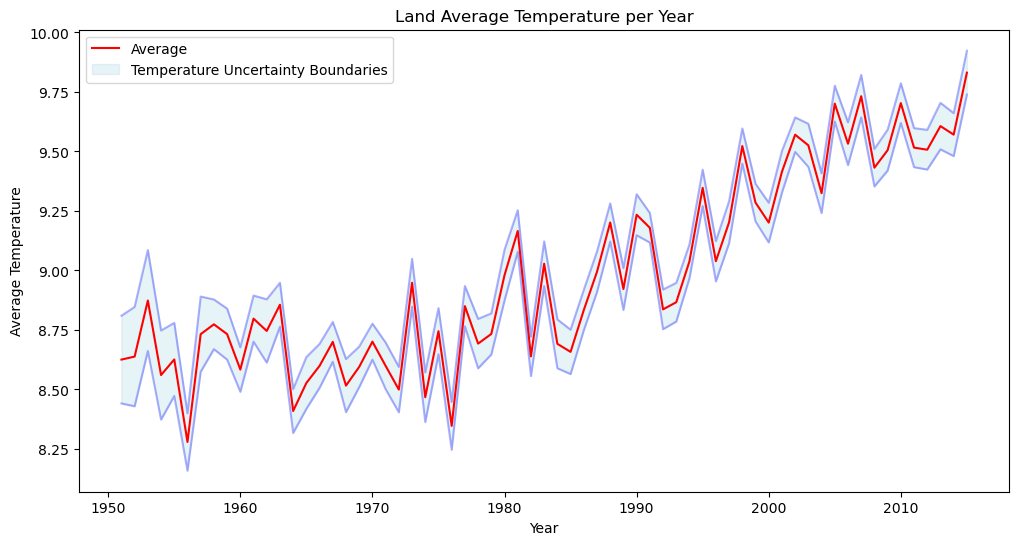

In [10]:
def plot_average_temp(df,col1,col2,label):
  cols = [col1,col2]
  temp_df = df[cols]
  average_per_year = df.groupby(df.index)[cols].mean()
    #yeh hai logic iss mein sabse kaam ka
  average_per_year['lower temp'] = average_per_year[col1] - average_per_year[col2]
  average_per_year['upper temp'] = average_per_year[col1] + average_per_year[col2]

  plt.figure(figsize=(12,6))
  plt.plot(average_per_year.index, average_per_year[col1], color='red', label='Average')
  plt.plot(average_per_year.index, average_per_year['upper temp'], color='blue', alpha=0.3)
  plt.plot(average_per_year.index, average_per_year['lower temp'], color='blue', alpha=0.3)
  plt.fill_between(average_per_year.index, average_per_year['upper temp'], average_per_year['lower temp'], color='lightblue', alpha=0.3, label='Temperature Uncertainty Boundaries')
  plt.xlabel('Year')
  plt.ylabel('Average Temperature')
  plt.title(label)
  plt.legend(loc='best')

# Land Average Temperature
plot_average_temp(df,'LandAverageTemperature','LandAverageTemperatureUncertainty','Land Average Temperature per Year')

In [11]:
#now there is a lot of uncertainity here before 1850 so ab ham ussi ke saath deal karenge thanks
#okay yeah this is fairly cool code thanks thanks

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 780 entries, 1951 to 2015
Data columns (total 2 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   LandAverageTemperature             780 non-null    float64
 1   LandAverageTemperatureUncertainty  780 non-null    float64
dtypes: float64(2)
memory usage: 15.2 KB


In [13]:
df.describe()

,LandAverageTemperature,LandAverageTemperatureUncertainty
count,780.000000,780.000000
mean,8.986132,0.098922
std,4.160762,0.043680
min,1.882000,0.034000
25%,4.871000,0.070000
50%,9.306000,0.087000
75%,13.153250,0.112250
max,15.482000,0.305000


In [14]:
df.index

Index([1951, 1951, 1951, 1951, 1951, 1951, 1951, 1951, 1951, 1951,
       ...
       2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015],
      dtype='int32', name='Year', length=780)

In [15]:
new = df.groupby('Year')[['LandAverageTemperature','LandAverageTemperatureUncertainty']].mean()
#new.head(50)

In [16]:
#honestly meko kaggle ka data set samjh nhi aaya so i will keep doing jo meko samjh aa rhe hai

In [17]:
X = np.array(new.index).reshape(-1,1)
Y = np.array(new.LandAverageTemperature)
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, Y, test_size=0.25, random_state=40)
print("Size of X_train: ", X_train.shape)
print("Size of X_test: ", X_test.shape)
print("Size of y_train: ", y_train.shape)
print("Size of y_test: ", y_test.shape)

Size of X_train:  (48, 1)
Size of X_test:  (17, 1)
Size of y_train:  (48,)
Size of y_test:  (17,)


In [20]:
y_pred = [y_train.mean()] * len(y_train)

# MAE
print('Base MAE (in degrees):', round(mean_absolute_error(y_train,y_pred),2))

NameError: name 'mean_absolute_error' is not defined

In [18]:
from sklearn import linear_model
import sklearn.model_selection

print("Length of new.index:", len(new.index))
print("Length of new.LandAverageTemperature:", len(new.LandAverageTemperature))


x = np.array(new.index).reshape(-1,1)
y = np.array(new.LandAverageTemperature)

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x,y, test_size = 0.1)
print("Size of X_train: ", x_train.shape)
print("Size of X_test: ", x_test.shape)
print("Size of y_train: ", y_train.shape)
print("Size of y_test: ", y_test.shape)

linear = linear_model.LinearRegression()
linear.fit(x_train, y_train)
ans = linear.score(x_test, y_test)
print(ans)





Length of new.index: 65
Length of new.LandAverageTemperature: 65
Size of X_train:  (58, 1)
Size of X_test:  (7, 1)
Size of y_train:  (58,)
Size of y_test:  (7,)
0.9005123401184941


In [19]:
#haan ab isse better karte hai cuz goddayum